In [1]:
import pandas as pd
import seaborn as seaborn
import statistics
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import AnchoredText
import os

In [89]:
Path_abund=pd.read_csv("Merged_Pathabundance_Table_CPM_meta.tsv",delimiter='\t')
Mapping_dict={}
for i in range(Path_abund.shape[0]):
    Mapping_dict['X'+str(i)]=Path_abund.iloc[i,0]
    Path_abund.iloc[i,0]='X'+str(i)
    
Path_abund.set_index(['Sample_ID'],inplace=True)
Path_abund.to_csv("Path_abundance_Temp.tsv")


In [90]:
Sig_Results=pd.read_csv("./Step 3 Path/significant_results.tsv",delimiter="\t")
Filter_By_pval=(Sig_Results['pval']<0.05)&(Sig_Results['qval']<0.05)
Sig_Results= Sig_Results.loc[Filter_By_pval]

Now, lets remove any pathway that is correlated with sex:

In [91]:
Sex_Correlated=list(Sig_Results[Sig_Results['metadata']=='Sex']['feature'])
Sig_Results[~Sig_Results['feature'].isin(Sex_Correlated)]

,feature,metadata,value,coef,stderr,N,N.not.0,pval,qval
0,X673,DSS_only,TRUE,-0.318167,0.011826,12,3,2.512774e-08,0.000104
1,X811,DSS_only,TRUE,-0.333693,0.012773,12,3,3.080961e-08,0.000104
3,X673,RCEwDSS_only,TRUE,-0.318167,0.016725,12,3,2.759777e-07,0.000456
4,X811,RCEwDSS_only,TRUE,-0.333693,0.018064,12,3,3.377835e-07,0.000456
7,X1541,DSS_only,TRUE,-0.789612,0.046589,12,6,6.100096e-07,0.000625
...,...,...,...,...,...,...,...,...,...
362,X1174,RCE_only,TRUE,1.300906,0.284811,12,9,2.581434e-03,0.048045
363,X404,DSS_only,TRUE,0.415552,0.091154,12,12,2.608609e-03,0.048284
364,X1696,DSS_only,TRUE,0.336030,0.073708,12,12,2.608308e-03,0.048284
365,X469,RCEwDSS_only,TRUE,-1.036158,0.227491,12,8,2.621324e-03,0.048387


In [92]:
Filter_Based_DSS=Sig_Results['metadata']=='DSS_only'
DSS=Sig_Results.loc[Filter_Based_DSS]

In [93]:
Path_abund=Path_abund.reset_index()
DSS=DSS.reset_index(drop=True)

In [94]:
Path_Abund_Filtered=Path_abund[Path_abund["Sample_ID"].isin(DSS["feature"])]
Path_Abund_Filtered=Path_Abund_Filtered.reset_index(drop=True)


In [95]:
for i in range(Path_Abund_Filtered.shape[0]):
       Path_Abund_Filtered.loc[i,"Sample_ID"]=Mapping_dict[Path_Abund_Filtered.loc[i,"Sample_ID"]]
Path_Abund_Filtered

,Sample_ID,Control_327,Control_328,Control_330,DSS_334,DSS_339,DSS_treatedp,D_Control,D_DSS,D_RCE,D_RCE_plus_DSS,RCE_318,RCE_319,RCE_322,RCE_plus_DSS_301,RCE_plus_DSS_305,RCE_plus_DSS_313,Start
0,UNINTEGRATED|g__Anaerotruncus.s__Anaerotruncus...,2209.720000,806.961000,1466.140000,0.000000,0.000000,0.00000,1150.940000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1459.160000
1,UNINTEGRATED|g__Bacteroides.s__Bacteroides_cae...,1457.060000,2931.060000,1888.640000,14091.300000,38722.900000,7306.65000,5068.930000,32309.700000,9277.03000,34711.400000,5342.990000,4583.260000,2888.890000,6105.400000,10933.40000,7245.98000,3842.750000
2,UNINTEGRATED|g__Dorea.s__Dorea_sp_5_2,4201.000000,5367.550000,4113.870000,0.000000,0.000000,0.00000,1495.060000,0.000000,0.00000,447.688000,0.000000,1660.430000,3252.700000,1869.830000,3068.41000,0.00000,0.000000
3,UNINTEGRATED|g__Lactobacillus.s__Lactobacillus...,1127.220000,697.283000,251.356000,0.000000,0.000000,0.00000,97.420500,0.000000,10.70520,0.000000,0.000000,26.030400,0.000000,0.000000,0.00000,0.00000,0.000000
4,UNINTEGRATED|g__Lactobacillus.s__Lactobacillus...,7309.850000,6375.800000,5098.490000,0.000000,1429.920000,0.00000,6046.280000,888.253000,7052.54000,1491.480000,5843.170000,5292.040000,5961.540000,1517.430000,6349.49000,0.00000,5606.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,TRNA-CHARGING-PWY: tRNA charging|g__Muribacula...,19.959500,13.742300,9.288840,0.000000,0.000000,0.00000,11.155900,0.000000,15.16890,0.000000,7.483740,5.801200,6.493200,0.000000,0.00000,0.00000,14.294500
207,UDPNAGSYN-PWY: UDP-N-acetyl-D-glucosamine bios...,1.619220,1.125010,0.855321,0.000000,0.319205,0.00000,0.561899,0.776336,0.00000,0.640989,0.000000,0.000000,0.000000,0.684882,0.00000,0.00000,0.000000
208,VALSYN-PWY: L-valine biosynthesis|g__Alistipes...,0.000000,0.000000,0.000000,0.997673,5.904690,1.34306,0.000000,2.089740,0.98305,2.852110,0.477253,0.672997,0.506535,0.476168,1.03415,3.74929,0.477856
209,VALSYN-PWY: L-valine biosynthesis|g__Bacteroid...,0.571982,0.533156,0.000000,11.635800,6.491870,6.85650,2.460700,13.550900,8.63931,8.663340,2.677510,0.000000,1.079250,5.689090,3.16522,6.29814,3.384350


In [96]:
Path_Abund_Unstratified_Filtered=Path_Abund_Filtered[~Path_Abund_Filtered['Sample_ID'].str.contains('|',regex=False)]
Path_Abund_Unstratified_Filtered=Path_Abund_Unstratified_Filtered.reset_index(drop=True)
Sig_Results=Sig_Results[Sig_Results['metadata']=='DSS_only']
Sig_Results.set_index("feature",inplace=True)

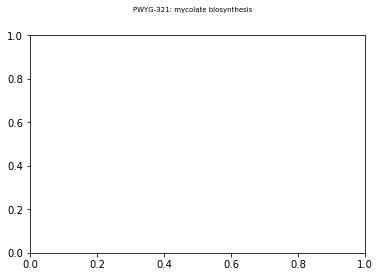

In [114]:
os.mkdir('Sig_Plots_Pathways/')
for i in range(Path_Abund_Unstratified_Filtered.shape[0]):
    x=[1,1,1,3,3,5,5,5,7,7,7]
    x1=list(np.linspace(0.5,1.5,100))
    x2=list(np.linspace(2.5,3.5,100))
    x3=list(np.linspace(4.5,5.5,100))
    x4=list(np.linspace(6.5,7.5,100))
    x5=[1,3,3,5,7]
    y=list(Path_Abund_Unstratified_Filtered.iloc[i,[1,2,3,4,5,11,12,13,14,15,16]])
    y1=[statistics.median(y[0:3])]*len(x1)
    y2=[statistics.median(y[3:5])]*len(x1)
    y3=[statistics.median(y[5:8])]*len(x1)
    y4=[statistics.median(y[8:11])]*len(x1)
    y5=Path_Abund_Unstratified_Filtered.iloc[i,[6,7,8,9,10]]
    plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='k',linewidth=1,linestyle="--")
    plt.scatter(x,y,s=25,cmap='summer')
    plt.scatter(x5,y5,s=30,cmap='r',marker=',')
    plt.suptitle(Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],fontsize=7)
    plt.xticks([1,3,5,7],['Control','DSS','RCE','RCE+DSS'])
    for keys in Mapping_dict:
        if Mapping_dict[keys]==Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"]:
            Temp=keys
    top_DSS=plt.ylim()[1]-1
    plt.text(6,top_DSS,"DSS_Only:"+ str(Sig_Results.loc[Temp,"value"])+"\n\nCoeff: "+ str(Sig_Results.loc[Temp,"coef"])[0:5]+"\n\nP_value: "+str(format(Sig_Results.loc[Temp,"pval"],'f'))+"\n\nQ_value: "+str(format(Sig_Results.loc[Temp,"qval"],'f')),fontsize=7,verticalalignment="top")
    plt.xlabel("Treatment Group")
    plt.ylabel("Path Abundances")
    plt.savefig("Sig_Plots_Pathways/"+Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"][0:6],dpi=300)
    plt.cla()

In [118]:
Path_Abund_Stratified_Filtered=Path_Abund_Filtered[Path_Abund_Filtered['Sample_ID'].str.contains('|',regex=False)]
Path_Abund_Stratified_Filtered=Path_Abund_Stratified_Filtered.reset_index(drop=True)
Sig_Results=Sig_Results[Sig_Results['metadata']=='DSS_only']


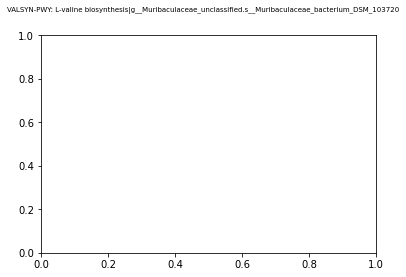

In [119]:
os.mkdir('Sig_Plots_Pathways_Stratified/')
for i in range(Path_Abund_Stratified_Filtered.shape[0]):
    x=[1,1,1,3,3,5,5,5,7,7,7]
    x1=list(np.linspace(0.5,1.5,100))
    x2=list(np.linspace(2.5,3.5,100))
    x3=list(np.linspace(4.5,5.5,100))
    x4=list(np.linspace(6.5,7.5,100))
    x5=[1,3,3,5,7]
    y=list(Path_Abund_Stratified_Filtered.iloc[i,[1,2,3,4,5,11,12,13,14,15,16]])
    y1=[statistics.median(y[0:3])]*len(x1)
    y2=[statistics.median(y[3:5])]*len(x1)
    y3=[statistics.median(y[5:8])]*len(x1)
    y4=[statistics.median(y[8:11])]*len(x1)
    y5=Path_Abund_Stratified_Filtered.iloc[i,[6,7,8,9,10]]
    plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='k',linewidth=1,linestyle="--")
    plt.scatter(x,y,s=25,cmap='summer')
    plt.scatter(x5,y5,s=30,cmap='r',marker=',')
    plt.suptitle(Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"],fontsize=7)
    plt.xticks([1,3,5,7],['Control','DSS','RCE','RCE+DSS'])
    for keys in Mapping_dict:
        if Mapping_dict[keys]==Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"]:
            Temp=keys
    top_DSS=plt.ylim()[1]-1
    plt.text(6,top_DSS,"DSS_Only:"+ str(Sig_Results.loc[Temp,"value"])+"\n\nCoeff: "+ str(Sig_Results.loc[Temp,"coef"])[0:5]+"\n\nP_value: "+str(format(Sig_Results.loc[Temp,"pval"],'f'))+"\n\nQ_value: "+str(format(Sig_Results.loc[Temp,"qval"],'f')),fontsize=7,verticalalignment="top")
    plt.xlabel("Treatment Group")
    plt.ylabel("Path Abundances")
    plt.savefig("Sig_Plots_Pathways_Stratified/"+Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"][0:6],dpi=300)
    plt.cla()

In [38]:
Rxn_abund=pd.read_csv("./rxn-cpm.txt",delimiter='\t')
Mapping_dict={}
for i in range(Rxn_abund.shape[0]):
    Mapping_dict['X'+str(i)]=Rxn_abund.iloc[i,0]
    Rxn_abund.iloc[i,0]='X'+str(i)
  
Rxn_abund.set_index(['Sample_ID'],inplace=True)
Rxn_abund.to_csv("Rxn_abundance_Temp.tsv")

In [39]:
Sig_Results=pd.read_csv("./Step 3 Rxn/significant_results.tsv",delimiter="\t")
Filter_By_pval=(Sig_Results['pval']<0.05)&(Sig_Results['qval']<0.05)
Sig_Results= Sig_Results.loc[Filter_By_pval]

In [40]:
Sex_Correlated=list(Sig_Results[Sig_Results['metadata']=='Sex']['feature'])
Sig_Results[~Sig_Results['feature'].isin(Sex_Correlated)]

,feature,metadata,value,coef,stderr,N,N.not.0,pval,qval
10,X30940,DSS_only,TRUE,-0.811391,0.034310,12,6,6.142307e-08,0.000588
11,X30854,DSS_only,TRUE,-0.331696,0.014564,12,3,7.970885e-08,0.000700
12,X16881,DSS_only,TRUE,0.889789,0.043536,12,6,1.683612e-07,0.001183
13,X19172,DSS_only,TRUE,0.889789,0.043536,12,6,1.683612e-07,0.001183
14,X28277,DSS_only,TRUE,0.889789,0.043536,12,6,1.683612e-07,0.001183
...,...,...,...,...,...,...,...,...,...
5163,X6332,DSS_only,TRUE,1.537017,0.333146,12,10,2.444434e-03,0.049877
5164,X12031,DSS_only,TRUE,-0.704602,0.152722,12,3,2.444525e-03,0.049877
5165,X14457,DSS_only,TRUE,-0.796059,0.172603,12,7,2.448937e-03,0.049957
5166,X31867,DSS_only,TRUE,1.192008,0.258476,12,11,2.450094e-03,0.049971


In [41]:
Filter_Based_DSS=Sig_Results['metadata']=='DSS_only'
DSS=Sig_Results.loc[Filter_Based_DSS]

In [42]:
Rxn_abund=Rxn_abund.reset_index()
DSS=DSS.reset_index(drop=True)

In [43]:
Rxn_Abund_Filtered=Rxn_abund[Rxn_abund["Sample_ID"].isin(DSS["feature"])]
Rxn_Abund_Filtered=Rxn_Abund_Filtered.reset_index(drop=True)

In [44]:
for i in range(Rxn_Abund_Filtered.shape[0]):
       Rxn_Abund_Filtered.loc[i,"Sample_ID"]=Mapping_dict[Rxn_Abund_Filtered.loc[i,"Sample_ID"]]
Rxn_Abund_Filtered

,Sample_ID,Control_327,Control_328,Control_330,DSS_334,DSS_339,DSS_treatedp,D_Control,D_DSS,D_RCE,D_RCE_plus_DSS,RCE_318,RCE_319,RCE_322,RCE_plus_DSS_301,RCE_plus_DSS_305,RCE_plus_DSS_313,Start
0,UNGROUPED|g__Bacteroides.s__Bacteroides_caecim...,1667.326255,3625.450957,2522.720216,13997.820610,36407.795960,10244.252350,6007.550322,27716.729600,7187.943313,32524.294300,4806.404374,4681.872176,3366.492410,6802.362918,10373.103980,9478.877585,4890.110247
1,UNGROUPED|g__Bacteroides.s__Bacteroides_vulgatus,0.000000,0.000000,0.000000,9681.620297,7712.722426,5024.388154,0.000000,9110.922297,6630.227268,7047.215860,0.000000,0.000000,0.000000,4754.958269,3021.292134,6111.360978,4020.174215
2,UNGROUPED|g__Bacteroides.s__Bacteroides_vulgat...,0.000000,0.000000,0.000000,254.511207,137.497821,113.784579,0.000000,269.676771,181.796462,178.288027,0.000000,0.000000,0.000000,95.288877,63.872390,110.094786,73.483841
3,UNGROUPED|g__Dorea.s__Dorea_sp_5_2,4807.377218,1787.789545,2833.233994,1021.091537,0.000000,0.000000,1640.490544,0.000000,0.000000,2074.596797,1727.657318,2321.174056,1800.029613,4136.227050,5964.212363,3065.928555,1172.322870
4,UNGROUPED|g__Lactobacillus.s__Lactobacillus_in...,1572.041903,1044.689807,425.471865,0.000000,0.000000,0.000000,121.241479,0.000000,57.910897,0.000000,0.000000,71.561624,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,XYLISOM-RXN|g__Alistipes.s__Alistipes_timonensis,0.000000,0.000000,0.000000,4.609650,5.974310,6.397120,0.000000,4.055550,1.194570,7.477030,4.661260,5.431870,0.884835,3.262840,1.065650,5.076930,2.227570
3214,XYLISOM-RXN|g__Bacteroides.s__Bacteroides_caec...,0.321202,1.324450,0.793821,5.229390,11.596600,5.475310,2.385140,9.106850,2.596200,12.804200,0.989656,1.745940,0.784983,2.914620,3.208790,4.761860,1.934090
3215,XYLISOM-RXN|g__Bacteroides.s__Bacteroides_vulg...,0.000000,0.000000,0.000000,0.225149,0.063949,0.070266,0.000000,0.016205,0.028442,0.012765,0.000000,0.000000,0.000000,0.043165,0.017435,0.083297,0.027275
3216,XYLISOM-RXN|g__Bacteroides.s__Bacteroides_vulg...,0.000000,0.000000,0.000000,0.067741,0.047972,0.018039,0.000000,0.080928,0.042662,0.038284,0.000000,0.000000,0.000000,0.014612,0.000000,0.016631,0.027229


In [45]:
Rxn_Abund_Unstratified_Filtered=Rxn_Abund_Filtered[~Rxn_Abund_Filtered['Sample_ID'].str.contains('|',regex=False)]
Rxn_Abund_Unstratified_Filtered=Rxn_Abund_Unstratified_Filtered.reset_index(drop=True)
Sig_Results=Sig_Results[Sig_Results['metadata']=='DSS_only']
Sig_Results.set_index("feature",inplace=True)

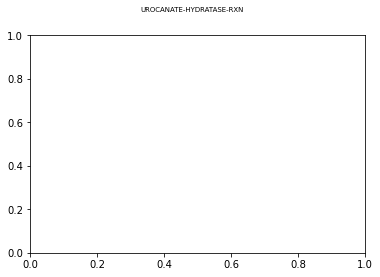

In [47]:
os.mkdir('Sig_Plots_Rxns/')
for i in range(Rxn_Abund_Unstratified_Filtered.shape[0]):
    x=[1,1,1,3,3,5,5,5,7,7,7]
    x1=list(np.linspace(0.5,1.5,100))
    x2=list(np.linspace(2.5,3.5,100))
    x3=list(np.linspace(4.5,5.5,100))
    x4=list(np.linspace(6.5,7.5,100))
    x5=[1,3,3,5,7]
    y=list(Rxn_Abund_Unstratified_Filtered.iloc[i,[1,2,3,4,5,11,12,13,14,15,16]])
    y1=[statistics.median(y[0:3])]*len(x1)
    y2=[statistics.median(y[3:5])]*len(x1)
    y3=[statistics.median(y[5:8])]*len(x1)
    y4=[statistics.median(y[8:11])]*len(x1)
    y5=Rxn_Abund_Unstratified_Filtered.iloc[i,[6,7,8,9,10]]
    plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='k',linewidth=1,linestyle="--")
    plt.scatter(x,y,s=25,cmap='summer')
    plt.scatter(x5,y5,s=30,cmap='r',marker=',')
    plt.suptitle(Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],fontsize=7)
    plt.xticks([1,3,5,7],['Control','DSS','RCE','RCE+DSS'])
    for keys in Mapping_dict:
        if Mapping_dict[keys]==Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"]:
            Temp=keys
    top_DSS=plt.ylim()[1]-1
    plt.text(6,top_DSS,"DSS_Only:"+ str(Sig_Results.loc[Temp,"value"])+"\n\nCoeff: "+ str(Sig_Results.loc[Temp,"coef"])[0:5]+"\n\nP_value: "+str(format(Sig_Results.loc[Temp,"pval"],'f'))+"\n\nQ_value: "+str(format(Sig_Results.loc[Temp,"qval"],'f')),fontsize=7,verticalalignment="top")
    plt.xlabel("Treatment Group")
    plt.ylabel("Path Abundances")
    plt.savefig("Sig_Plots_Rxns/"+Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"][0:6]+'.png',dpi=300)
    plt.cla()

In [48]:
Rxn_Abund_Stratified_Filtered=Rxn_Abund_Filtered[Rxn_Abund_Filtered['Sample_ID'].str.contains('|',regex=False)]
Rxn_Abund_Stratified_Filtered=Rxn_Abund_Stratified_Filtered.reset_index(drop=True)
Sig_Results=Sig_Results[Sig_Results['metadata']=='DSS_only']



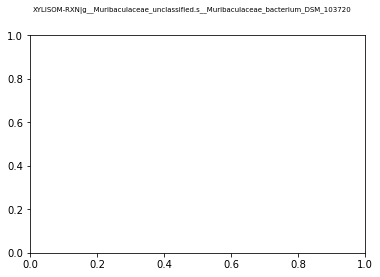

In [49]:
os.mkdir('Sig_Plots_Stratified_Rxns/')
for i in range(Rxn_Abund_Stratified_Filtered.shape[0]):
    x=[1,1,1,3,3,5,5,5,7,7,7]
    x1=list(np.linspace(0.5,1.5,100))
    x2=list(np.linspace(2.5,3.5,100))
    x3=list(np.linspace(4.5,5.5,100))
    x4=list(np.linspace(6.5,7.5,100))
    x5=[1,3,3,5,7]
    y=list(Rxn_Abund_Stratified_Filtered.iloc[i,[1,2,3,4,5,11,12,13,14,15,16]])
    y1=[statistics.median(y[0:3])]*len(x1)
    y2=[statistics.median(y[3:5])]*len(x1)
    y3=[statistics.median(y[5:8])]*len(x1)
    y4=[statistics.median(y[8:11])]*len(x1)
    y5=Rxn_Abund_Stratified_Filtered.iloc[i,[6,7,8,9,10]]
    plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='k',linewidth=1,linestyle="--")
    plt.scatter(x,y,s=25,cmap='summer')
    plt.scatter(x5,y5,s=30,cmap='r',marker=',')
    plt.suptitle(Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"],fontsize=7)
    plt.xticks([1,3,5,7],['Control','DSS','RCE','RCE+DSS'])
    for keys in Mapping_dict:
        if Mapping_dict[keys]==Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"]:
            Temp=keys
    top_DSS=plt.ylim()[1]-1
    plt.text(6,top_DSS,"DSS_Only:"+ str(Sig_Results.loc[Temp,"value"])+"\n\nCoeff: "+ str(Sig_Results.loc[Temp,"coef"])[0:5]+"\n\nP_value: "+str(format(Sig_Results.loc[Temp,"pval"],'f'))+"\n\nQ_value: "+str(format(Sig_Results.loc[Temp,"qval"],'f')),fontsize=7,verticalalignment="top")
    plt.xlabel("Treatment Group")
    plt.ylabel("Path Abundances")
    plt.savefig("Sig_Plots_Rxns/"+Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"][0:6]+'.png',dpi=300)
    plt.cla()